In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns


In [13]:
# save df_data as behav_df_cleaned_new.csv
df_data = pd.read_csv(r'C:\Users\qmoreau\Documents\Work\Beta_bursts\Behavioral\behav_df_cleaned_new.csv')

df_data_implicit = df_data[df_data['group'] == 'Implicit']
df_data_explicit = df_data[df_data['group'] == 'Explicit']

In [3]:
df_data_implicit_avg = df_data_implicit.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)
df_data_explicit_avg = df_data_explicit.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)

coh_cat_order = ["zero", "low", "med", "high"]

# Convert the 'coh_cat' column to a categorical data type with the desired order
df_data_implicit_avg['coh_cat'] = pd.Categorical(df_data_implicit_avg['coh_cat'], categories=coh_cat_order, ordered=True)
df_data_explicit_avg['coh_cat'] = pd.Categorical(df_data_explicit_avg['coh_cat'], categories=coh_cat_order, ordered=True)


In [4]:
block_0_means_implicit = df_data_implicit_avg['reach_vis_abs_err'][df_data_implicit_avg['block'] == 0]
block_0_means_implicit = np.array(block_0_means_implicit)

for i, subject in enumerate(df_data_implicit_avg['subject'].unique()):
    baseline_value = block_0_means_implicit[i]
    # print(subject, baseline_value)
    df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

block_0_means_explicit = df_data_explicit_avg['reach_vis_abs_err'][df_data_explicit_avg['block'] == 0]
block_0_means_explicit = np.array(block_0_means_explicit)

for i, subject in enumerate(df_data_explicit_avg['subject'].unique()):
    baseline_value = block_0_means_explicit[i]
    # print(subject, baseline_value)
    df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

In [5]:
block_0_means_implicit = df_data_implicit_avg['reach_vis_err'][df_data_implicit_avg['block'] == 0]
block_0_means_implicit = np.array(block_0_means_implicit)

for i, subject in enumerate(df_data_implicit_avg['subject'].unique()):
    baseline_value = block_0_means_implicit[i]
    # print(subject, baseline_value)
    df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

block_0_means_explicit = df_data_explicit_avg['reach_vis_err'][df_data_explicit_avg['block'] == 0]
block_0_means_explicit = np.array(block_0_means_explicit)

for i, subject in enumerate(df_data_explicit_avg['subject'].unique()):
    baseline_value = block_0_means_explicit[i]
    # print(subject, baseline_value)
    df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

In [6]:
# Baseline Error Values

df_data_implicit_avg_trial = df_data_implicit.groupby(['subject', 'block', 'trial'], as_index=False).mean(numeric_only=True)
df_data_explicit_avg_trial = df_data_explicit.groupby(['subject','block', 'trial'], as_index=False).mean(numeric_only=True)

block_0_means_implicit = df_data_implicit_avg_trial['reach_vis_err'][df_data_implicit_avg_trial['block'] == 0]
block_0_means_implicit = np.array(block_0_means_implicit)

for i, subject in enumerate(df_data_implicit_avg_trial['subject'].unique()):
    baseline_value = block_0_means_implicit[i]
    # print(subject, baseline_value)
    df_data_implicit_avg_trial.loc[df_data_implicit_avg_trial['subject'] == subject, 'reach_vis_err_corrected'] = df_data_implicit_avg_trial.loc[df_data_implicit_avg_trial['subject'] == subject, 'reach_vis_err'] - baseline_value

df_data_implicit_avg_trial_trial_new = df_data_implicit_avg_trial.groupby(['block', 'trial'], as_index=False).mean(numeric_only=True)

block_0_means_explicit = df_data_explicit_avg_trial['reach_vis_err'][df_data_explicit_avg_trial['block'] == 0]
block_0_means_explicit = np.array(block_0_means_explicit)

for i, subject in enumerate(df_data_explicit_avg_trial['subject'].unique()):
    baseline_value = block_0_means_explicit[i]
    # print(subject, baseline_value)
    df_data_explicit_avg_trial.loc[df_data_explicit_avg_trial['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_explicit_avg_trial.loc[df_data_explicit_avg_trial['subject'] == subject, 'reach_vis_abs_err'] - baseline_value


# df_data_explicit_avg_trial["reach_vis_err_corrected_abs"] = np.abs(df_data_explicit_avg_trial["reach_vis_err_corrected"])
df_data_explicit_avg_trial_trial_new = df_data_explicit_avg_trial.groupby(['block', 'trial'], as_index=False).mean(numeric_only=True)


In [7]:
# Create a new column for trial index

df_data_implicit_avg_trial_trial_new['trial_idx'] = df_data_implicit_avg_trial_trial_new.groupby('block').cumcount()
df_data_implicit_avg_trial_trial_new['trial_idx'] += df_data_implicit_avg_trial_trial_new['block'] * (df_data_implicit_avg_trial_trial_new['trial'].nunique())

df_data_explicit_avg_trial_trial_new['trial_idx'] = df_data_explicit_avg_trial_trial_new.groupby('block').cumcount()
df_data_explicit_avg_trial_trial_new['trial_idx'] += df_data_explicit_avg_trial_trial_new['block'] * (df_data_explicit_avg_trial_trial_new['trial'].nunique())


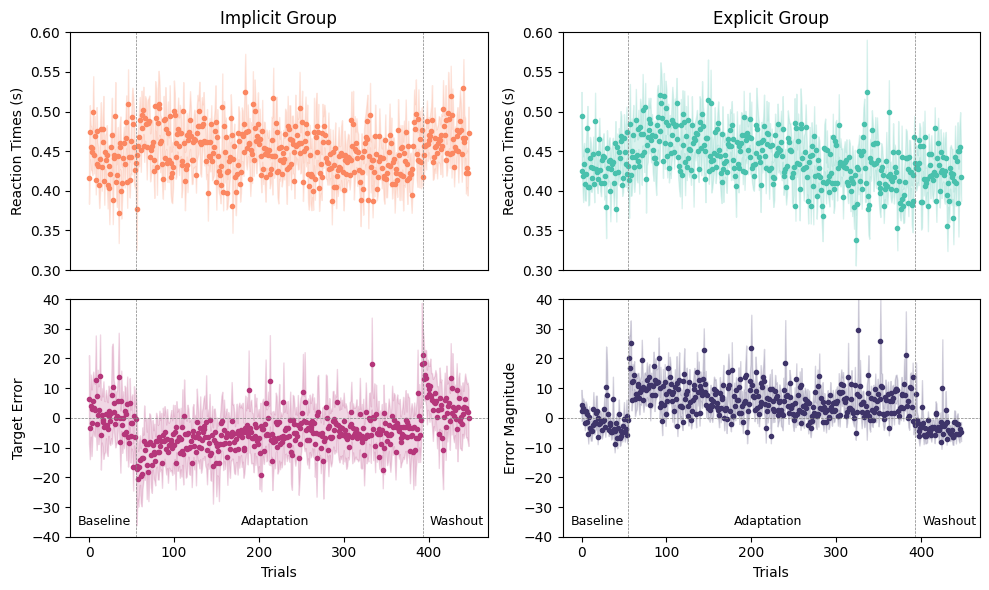

In [8]:
# Calculate standard error for group 0
implicit_rt_std_err = df_data_implicit_avg_trial.groupby(['block', 'trial'])['reach_rt'].sem().values
implicit_vis_err_std_err = df_data_implicit_avg_trial.groupby(['block', 'trial'])['reach_vis_err_corrected'].sem().values

# Calculate standard error for group 1
explicit_rt_std_err = df_data_explicit_avg_trial.groupby(['block', 'trial'])['reach_rt'].sem().values
explicit_vis_err_std_err = df_data_explicit_avg_trial.groupby(['block', 'trial'])['reach_vis_abs_err_corrected'].sem().values

palette0 = sns.color_palette("magma_r", 3)
palette1 = sns.color_palette("mako_r", 3)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot behavior for group 0 (Reaction Times)
axes[0, 0].plot(df_data_implicit_avg_trial_trial_new["trial_idx"], df_data_implicit_avg_trial_trial_new["reach_rt"], marker='o', linestyle='', color=palette0[0], markersize=3)
axes[0, 0].fill_between(df_data_implicit_avg_trial_trial_new["trial_idx"], df_data_implicit_avg_trial_trial_new["reach_rt"] - implicit_rt_std_err, df_data_implicit_avg_trial_trial_new["reach_rt"] + implicit_rt_std_err, color=palette0[0], alpha=0.2)
axes[0, 0].set_ylim(0.3, 0.6)
axes[0, 0].set_xlabel("Trials")
axes[0, 0].set_ylabel("Reaction Times (s)")
axes[0, 0].set_title("Implicit Group")
axes[0, 0].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[0, 0].axvline(len(df_data_explicit_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55
axes[0, 0].set_xlabel('')
axes[0, 0].set_xticks([])

# Plot behavior for group 1 (Reaction Times)
axes[0, 1].plot(df_data_explicit_avg_trial_trial_new["trial_idx"], df_data_explicit_avg_trial_trial_new["reach_rt"], marker='o', linestyle='', color=palette1[0], markersize=3)
axes[0, 1].fill_between(df_data_explicit_avg_trial_trial_new["trial_idx"], df_data_explicit_avg_trial_trial_new["reach_rt"] - explicit_rt_std_err, df_data_explicit_avg_trial_trial_new["reach_rt"] + explicit_rt_std_err, color=palette1[0], alpha=0.2)
axes[0, 1].set_ylim(0.3, 0.6)
axes[0, 1].set_xlabel("Trials")
axes[0, 1].set_ylabel("Reaction Times (s)")
axes[0, 1].set_title("Explicit Group")
axes[0, 1].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[0, 1].axvline(len(df_data_explicit_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55
axes[0, 1].set_xlabel('')
axes[0, 1].set_xticks([])

# Plot behavior for group 0 (Error Magnitude)
axes[1, 0].plot(df_data_implicit_avg_trial_trial_new["trial_idx"], df_data_implicit_avg_trial_trial_new["reach_vis_err_corrected"], marker='o', linestyle='', color=palette0[1], markersize=3)
axes[1, 0].fill_between(df_data_explicit_avg_trial_trial_new["trial_idx"], df_data_implicit_avg_trial_trial_new["reach_vis_err_corrected"] - implicit_vis_err_std_err, df_data_implicit_avg_trial_trial_new["reach_vis_err_corrected"] + implicit_vis_err_std_err, color=palette0[1], alpha=0.2)
axes[1, 0].set_ylim(-40, 40)
axes[1, 0].set_xlabel("Trials")
axes[1, 0].set_ylabel("Target Error")
axes[1, 0].axhline(0, linestyle='--', color='gray', linewidth = 0.5)  # Add horizontal line at y=0
axes[1, 0].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[1, 0].axvline(len(df_data_explicit_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55

# add text boxes
axes[1, 0].text(50, -37, "Baseline", fontsize=9, ha='right', va='bottom')
axes[1, 0].text(260, -37, "Adaptation", fontsize=9, ha='right', va='bottom')
axes[1, 0].text(465, -37, "Washout", fontsize=9, ha='right', va='bottom')

# Plot behavior for group 1 (Error Magnitude)
axes[1, 1].plot(df_data_explicit_avg_trial_trial_new["trial_idx"], df_data_explicit_avg_trial_trial_new["reach_vis_abs_err_corrected"], marker='o', linestyle='', color=palette1[2], markersize=3)
axes[1, 1].fill_between(df_data_explicit_avg_trial_trial_new["trial_idx"], df_data_explicit_avg_trial_trial_new["reach_vis_abs_err_corrected"] - explicit_vis_err_std_err, df_data_explicit_avg_trial_trial_new["reach_vis_abs_err_corrected"] + explicit_vis_err_std_err, color=palette1[2], alpha=0.2)
axes[1, 1].set_ylim(-40, 40)
axes[1, 1].set_xlabel("Trials")
axes[1, 1].set_ylabel("Error Magnitude")
axes[1, 1].axhline(0, linestyle='--', color='gray', linewidth = 0.5)  # Add horizontal line at y=0
axes[1, 1].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[1, 1].axvline(len(df_data_explicit_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55


# add text boxes
axes[1, 1].text(50, -37, "Baseline", fontsize=9, ha='right', va='bottom')
axes[1, 1].text(260, -37, "Adaptation", fontsize=9, ha='right', va='bottom')
axes[1, 1].text(465, -37, "Washout", fontsize=9, ha='right', va='bottom')

plt.tight_layout()
# Show the combined plot
plt.show()


In [9]:
df_data_implicit_avg = df_data_implicit.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)
df_data_explicit_avg = df_data_explicit.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)

coh_cat_order = ["zero", "low", "med", "high"]

# Convert the 'coh_cat' column to a categorical data type with the desired order
df_data_implicit_avg['coh_cat'] = pd.Categorical(df_data_implicit_avg['coh_cat'], categories=coh_cat_order, ordered=True)
df_data_explicit_avg['coh_cat'] = pd.Categorical(df_data_explicit_avg['coh_cat'], categories=coh_cat_order, ordered=True)


In [10]:
block_0_means_implicit = df_data_implicit_avg['reach_vis_err'][df_data_implicit_avg['block'] == 0]
block_0_means_implicit = np.array(block_0_means_implicit)

for i, subject in enumerate(df_data_implicit_avg['subject'].unique()):
    baseline_value = block_0_means_implicit[i]
    # print(subject, baseline_value)
    df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

block_0_means_explicit = df_data_explicit_avg['reach_vis_err'][df_data_explicit_avg['block'] == 0]
block_0_means_explicit = np.array(block_0_means_explicit)

for i, subject in enumerate(df_data_explicit_avg['subject'].unique()):
    baseline_value = block_0_means_explicit[i]
    # print(subject, baseline_value)
    df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

In [11]:
block_0_means_implicit = df_data_implicit_avg['reach_vis_abs_err'][df_data_implicit_avg['block'] == 0]
block_0_means_implicit = np.array(block_0_means_implicit)

for i, subject in enumerate(df_data_implicit_avg['subject'].unique()):
    baseline_value = block_0_means_implicit[i]
    # print(subject, baseline_value)
    df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

block_0_means_explicit = df_data_explicit_avg['reach_vis_abs_err'][df_data_explicit_avg['block'] == 0]
block_0_means_explicit = np.array(block_0_means_explicit)

for i, subject in enumerate(df_data_explicit_avg['subject'].unique()):
    baseline_value = block_0_means_explicit[i]
    # print(subject, baseline_value)
    df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

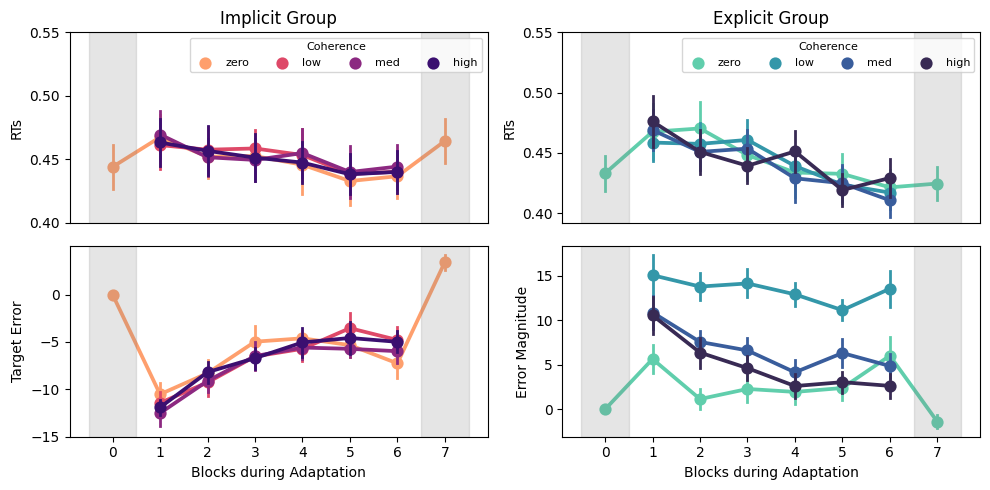

In [12]:

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Plot behavior for group 0 (RTs) with Magma palette
sns.pointplot(x="block", y="reach_rt", hue="coh_cat", data=df_data_implicit_avg, errorbar="se", ax=axes[0, 0], palette="magma_r", errwidth=2)
axes[0, 0].set_xlabel("")
axes[0, 0].set_yticks(np.arange(0.40, 0.55, .05))
axes[0, 0].set_ylabel("RTs")
axes[0, 0].set_title("Implicit Group")
# remove x ticks
axes[0, 0].set_xticks([])
axes[0, 0].legend(loc='upper right', title="Coherence", ncols=4, fontsize=8, title_fontsize=8)
# Add shaded boxes
axes[0, 0].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[0, 0].axvspan(6.5, 7.5, color='gray', alpha=0.2)

# Plot behavior for group 1 (RTs)
sns.pointplot(x="block", y="reach_rt", hue="coh_cat", data=df_data_explicit_avg, errorbar="se", ax=axes[0, 1], palette="mako_r", errwidth=2)
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("RTs")
axes[0, 1].set_yticks(np.arange(0.40, 0.55, .05))
axes[0, 1].set_title("Explicit Group")
axes[0, 1].set_xticks([])
axes[0, 1].legend(loc='upper right', title="Coherence", ncols=4, fontsize=8, title_fontsize=8)
# Add shaded boxes
axes[0, 1].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[0, 1].axvspan(6.5, 7.5, color='gray', alpha=0.2)

# Plot behavior for group 0 (Errors)
sns.pointplot(x="block", y="reach_vis_err_corrected", hue="coh_cat", data=df_data_implicit_avg, errorbar="se", ax=axes[1, 0], palette="magma_r", errwidth=2)
axes[1, 0].set_xlabel("Blocks during Adaptation")
axes[1, 0].set_yticks(np.arange(-15, 1, 5))
axes[1, 0].set_ylabel("Target Error")
# Add shaded boxes
axes[1, 0].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[1, 0].axvspan(6.5, 7.5, color='gray', alpha=0.2)

# Plot behavior for group 1 (Errors)
sns.pointplot(x="block", y="reach_vis_abs_err_corrected", hue="coh_cat", data=df_data_explicit_avg, errorbar="se", ax=axes[1, 1], palette="mako_r", errwidth=2)
axes[1, 1].set_yticks(np.arange(0, 20, 5))
axes[1, 1].set_xlabel("Blocks during Adaptation")
axes[1, 1].set_ylabel("Error Magnitude")
# Remove the legends
axes[1, 0].get_legend().remove()
axes[1, 1].get_legend().remove()
# Add shaded boxes
axes[1, 1].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[1, 1].axvspan(6.5, 7.5, color='gray', alpha=0.2)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()
